In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the uploaded file to inspect its structure
file_path = '../Data/speed_dating.csv'
df = pd.read_csv(file_path)


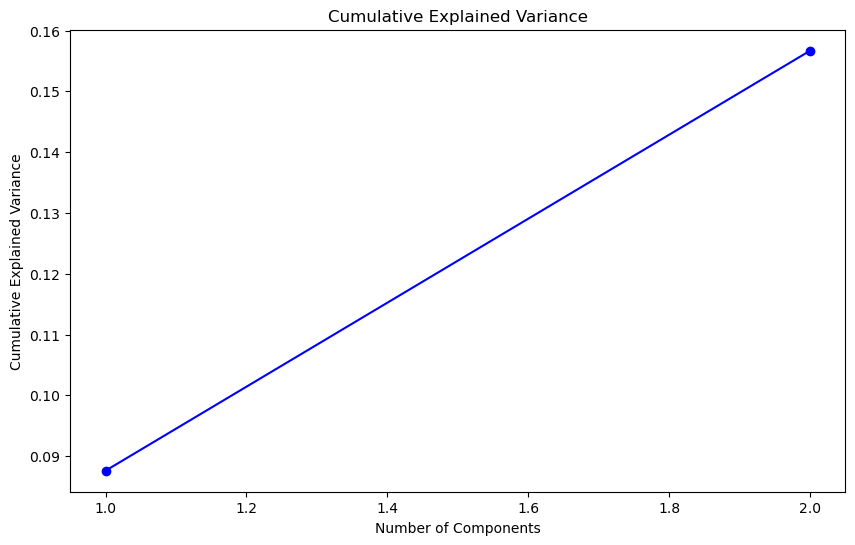

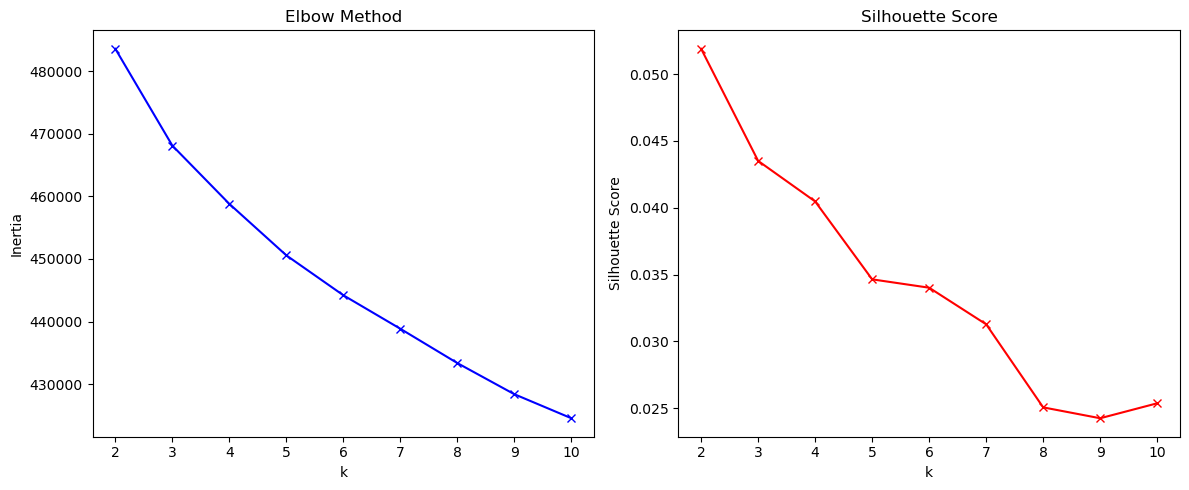

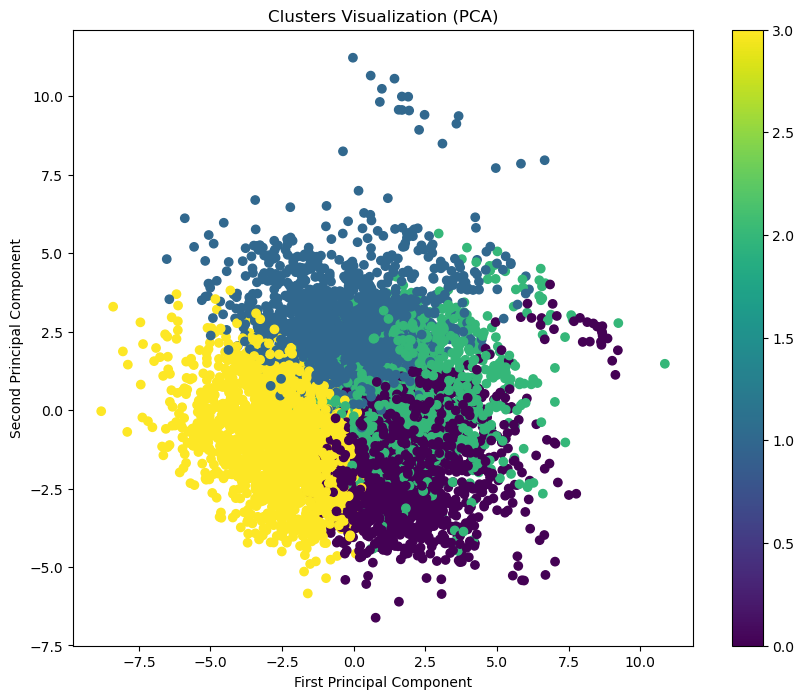

Cluster Summary:
               age           match
              mean count      mean
Cluster                           
0        26.042509  1929  0.021773
1        26.036693  1935  0.250129
2        27.002846  1757  0.063745
3        26.383750  2757  0.269133


In [2]:
# Data Preprocessing
def preprocess_data(df):
    # Remove non-numeric columns and columns with high cardinality
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    data = df[numeric_cols]
    
    # Handle missing values
    data = data.fillna(data.mean())
    
    # Remove columns with constant values or near-constant values
    data = data.loc[:, data.nunique() > 1]
    
    return data

# Preprocess the data
processed_data = preprocess_data(df)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Dimensionality Reduction with PCA
def apply_pca(scaled_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    
    # Explained variance plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
             pca.explained_variance_ratio_.cumsum(), 'bo-')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()
    
    return pca_result, pca

# Apply PCA
pca_result, pca_model = apply_pca(scaled_data)

# Elbow Method for Determining Optimal Clusters
def elbow_method(scaled_data):
    inertias = []
    silhouette_scores = []
    k_range = range(2, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    
    # Plot Elbow Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(k_range, inertias, 'bx-')
    plt.title('Elbow Method')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    
    plt.subplot(122)
    plt.plot(k_range, silhouette_scores, 'rx-')
    plt.title('Silhouette Score')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.show()

# Run Elbow Method
elbow_method(scaled_data)

# K-Means Clustering
def perform_clustering(scaled_data, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Visualize clusters in PCA space
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                          c=cluster_labels, cmap='viridis')
    plt.title(f'Clusters Visualization (PCA)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)
    plt.show()
    
    return cluster_labels, kmeans

# Perform Clustering
cluster_labels, kmeans_model = perform_clustering(scaled_data)

# Cluster Characteristics Analysis
def analyze_clusters(df, cluster_labels):
    df_clustered = df.copy()
    df_clustered['Cluster'] = cluster_labels
    
    # Aggregate characteristics by cluster
    cluster_summary = df_clustered.groupby('Cluster').agg({
        'age': ['mean', 'count'],
        'match': ['mean']
    })
    
    print("Cluster Summary:")
    print(cluster_summary)

# Analyze Clusters
analyze_clusters(df, cluster_labels)

## Rationale for Choices:

1. PCA: Reduces dimensionality, helps visualize high-dimensional data
2. K-Means: Simple, interpretable clustering algorithm
3. Elbow Method: Objective way to select number of clusters
4. Silhouette Score: Validates cluster quality